# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [107]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Libraries for data preparation and model building
import statsmodels.graphics.api as sga
import statsmodels.formula.api as sfa
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import re

# print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [93]:
# function to display all rows in a df
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
            display(df)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [146]:
df = pd.read_csv('df_train.csv', parse_dates=['time'])
dftest= pd.read_csv('df_test.csv', parse_dates=['time'])

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [8]:
# Check for summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [4]:
# look at data statistics
# Checking for missing values

df.isna().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [6]:
# Check for column object type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

### plot relevant feature interactions

In [ ]:
# Create a scatterplot of all numerical columns against the dependent variable 

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [150]:
def add_datepart (df, fldname):
    fld = df[fldname]
    targ_pre = re.sub('[Dd]ates','', fldname)
    for n in ("Year", "Month", "Week", "Day", "Hour", "Dayofweek", "Dayofyear", "Is_month_end", "Is_month_start", 
              "Is_quarter_end", "Is_quarter_start", "Is_year_end", "Is_year_start"):
        df[targ_pre+n] = getattr(fld.dt, n.lower())
    df[targ_pre+'Elapsed' ] = (fld - fld.min()).dt.days
    df.drop(fldname, axis=1, inplace=True)
    return df

In [151]:
df1= add_datepart(df.copy(), 'time')
dftest1= add_datepart(dftest.copy(), 'time')

In [59]:
def conditional_impute(input_df, choice='mean'):
    # your code here
    
    if choice == 'mean':
        input_df['Valencia_pressure']= input_df.groupby(['timeYear', 'timeMonth'])['Valencia_pressure'].apply(lambda x: x.fillna(round(x.mean(), 1)))
        return input_df
    elif choice== 'median':
        input_df['Valencia_pressure']= input_df.groupby(['timeYear', 'timeMonth'])['Valencia_pressure'].apply(lambda x: x.fillna(x.median()))
        return input_df
    else:
        raise ValueError

In [153]:
df1[(df1['timeHour']==0) & (df1['timeIs_year_start']==1)]


,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,timeHour,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
2915,2915,1.0,level_6,0.6,1.666667,98.666667,98.0,13.333333,0.333333,84.000000,...,0,4,1,False,True,False,True,False,True,364
5843,5843,1.0,level_4,0.0,0.666667,91.000000,92.0,0.000000,0.333333,2.666667,...,0,6,1,False,True,False,True,False,True,730


In [154]:
dftest1[(dftest1['timeHour']==0) & (dftest1['timeIs_year_start']==1)]

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,timeHour,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,8763,5.0,level_8,0.0,5.0,87.0,71.333333,20.0,3.0,0.0,...,0,0,1,False,True,False,True,False,True,0


In [155]:
# remove missing values/ features
 
df1_mean= conditional_impute(df1, 'mean') #df.isna filled with mean of year and quarter readings 
df1_median= conditional_impute(df1, 'median') #df.isna filled with median of year and quarter readings 
dftest1_mean= conditional_impute(dftest1, 'mean')

### create new features

### engineer existing features

In [102]:
# look at unique values in object df

print(df1_mean.Valencia_wind_deg.unique())
print(df1_mean.Seville_pressure.unique())

[ 5 10  9  8  7  6  4  3  1  2]
[25 23 24 21 16  9 15 19 22 11  8  4  6 13 17 20 18 14 12  5 10  7  3  2
  1]


In [96]:
# converting 

df1_mean['Valencia_wind_deg']= df1_mean["Valencia_wind_deg"].str.extract("(\d+)").astype(int)
df1_mean["Seville_pressure"] = df1_mean["Seville_pressure"].str.extract("(\d+)").astype(int)

In [156]:
dftest1_mean['Valencia_wind_deg']= dftest1_mean["Valencia_wind_deg"].str.extract("(\d+)").astype(int)
dftest1_mean["Seville_pressure"] = dftest1_mean["Seville_pressure"].str.extract("(\d+)").astype(int)

In [103]:
df1_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   int32  
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [158]:
display_all(dftest1_mean.isna().sum())

Unnamed: 0              0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [159]:
dftest1_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   Madrid_wind_speed     2920 non-null   float64
 2   Valencia_wind_deg     2920 non-null   int32  
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h    

In [175]:
display_all(df1_mean.corr()['load_shortfall_3h'])

Unnamed: 0              0.192612
Madrid_wind_speed      -0.150981
Bilbao_rain_1h         -0.152510
Valencia_wind_speed    -0.142791
Seville_humidity       -0.167290
Madrid_humidity        -0.150536
Bilbao_clouds_all      -0.127293
Bilbao_wind_speed      -0.081602
Seville_clouds_all     -0.091804
Bilbao_wind_deg        -0.120800
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Madrid_clouds_all      -0.081623
Seville_wind_speed     -0.048433
Barcelona_rain_1h      -0.056633
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Barcelona_pressure     -0.034385
Seville_rain_3h        -0.032945
Madrid_rain_1h         -0.027159
Barcelona_rain_3h      -0.024720
Valencia_snow_3h       -0.021633
Madrid_weather_id       0.030868
Barcelona_weather_id    0.063868
Bilbao_pressure         0.039052
Seville_weather_id      0.061104
Valencia_pressure       0.092574
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_temp_max       0.144270
Valencia_t

<AxesSubplot:>

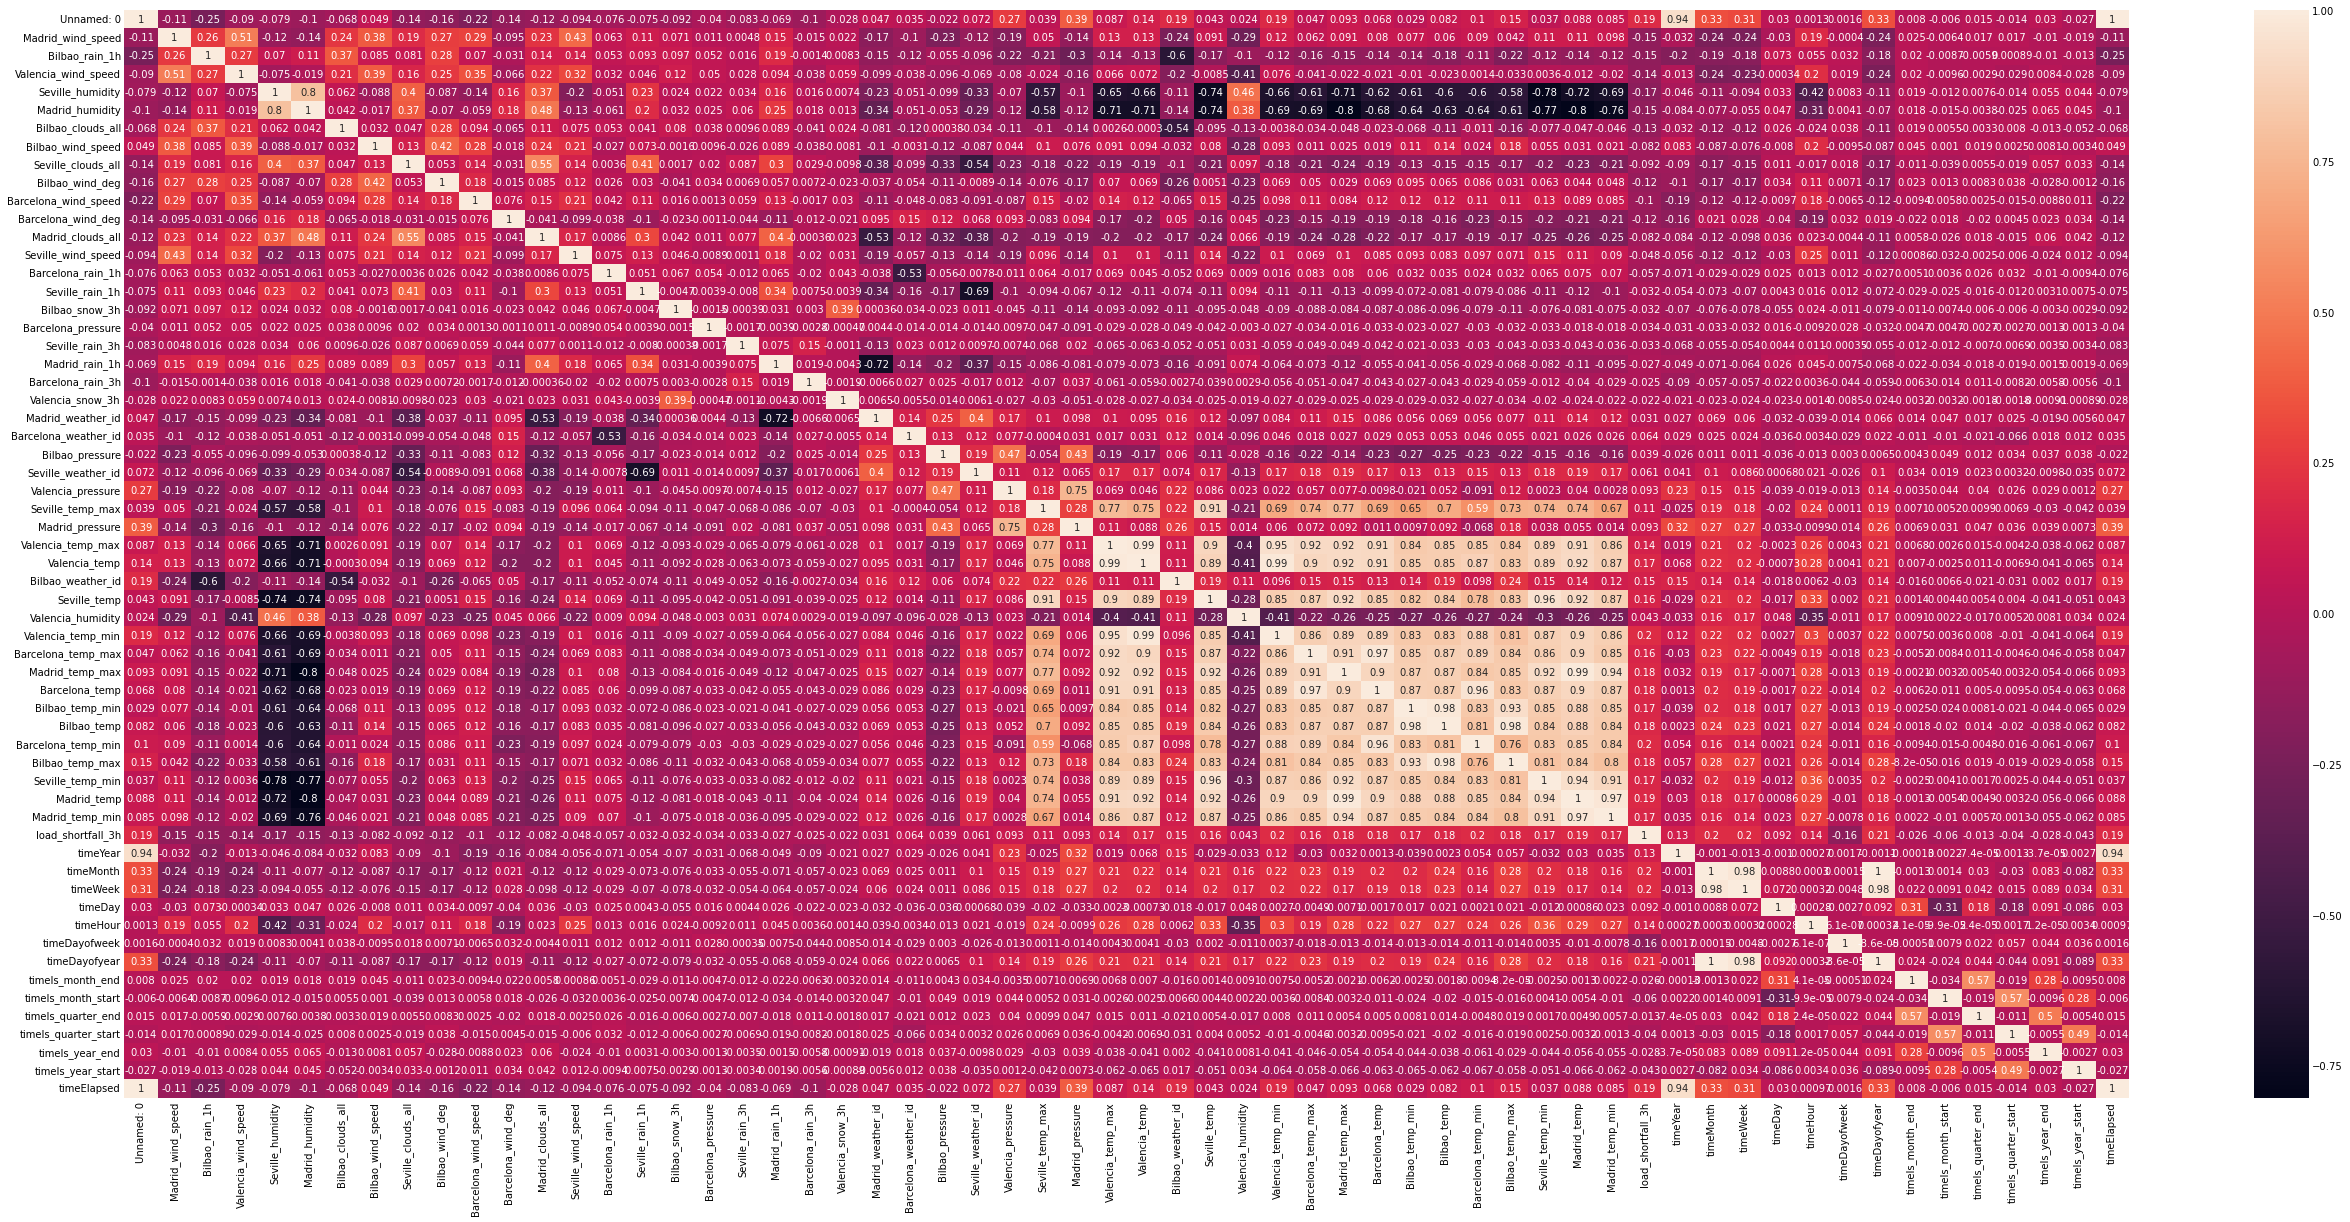

In [178]:
fig, axes= plt.subplots(figsize=(40,20))
sns.heatmap(df1_mean.corr(), annot=True)
plt.show()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [122]:
y.head()

0    6715.666667
1    4171.666667
2    4274.666667
3    5075.666667
4    6620.666667
Name: load_shortfall_3h, dtype: float64

In [133]:
# split data
X=df1_mean.copy().drop('load_shortfall_3h', axis=1)
y=df1_mean[['load_shortfall_3h']]

X_train, X_test, y_train, y_test= train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=6)

In [134]:
type(y)

pandas.core.frame.DataFrame

In [135]:
# create targets and features dataset
RF= RandomForestRegressor(n_jobs=-1)

In [179]:
# fit model
RF.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [180]:
RF.score(X_train, y_train)

0.9653097856252791

In [144]:
y_pred= RF.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted')

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

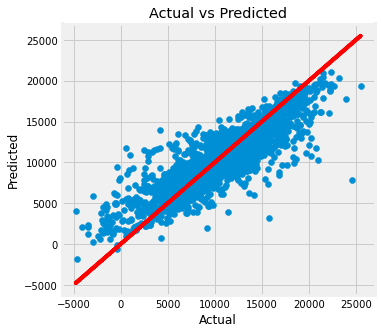

In [145]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

In [160]:
kag_pred= RF.predict(dftest1_mean)

In [161]:
kag_pred

array([ 9134.75333333,  6391.86666667,  5914.31666667, ...,
       13741.13      , 13081.46      , 12697.56      ])

In [168]:
kag_pred_df= pd.DataFrame(kag_pred, columns=['load_shortfall_3h'])

In [169]:
kag_hour= dftest['time']

In [170]:
kag_pred_df

,load_shortfall_3h
0,9134.753333
1,6391.866667
2,5914.316667
3,8437.736667
4,10713.393333
...,...
2915,12160.750000
2916,13030.031667
2917,13741.130000
2918,13081.460000


In [171]:
submit= pd.concat([kag_hour, kag_pred_df], axis=1)

In [172]:
submit.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9134.753333
1,2018-01-01 03:00:00,6391.866667
2,2018-01-01 06:00:00,5914.316667
3,2018-01-01 09:00:00,8437.736667
4,2018-01-01 12:00:00,10713.393333


In [173]:
submit.to_csv('submit_rf1.csv', index=False)

In [ ]:
# create one or more ML model

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic